<a href="https://colab.research.google.com/github/abishekabi/Volcanic-Eruption-Prediction/blob/main/Abishek_predict_volcanic_eruptions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#      Volcanic Eruption Prediction.

> In this competition, we will predict when a volcano's next eruption will occur. we are analyzing a large geophysical dataset collected by sensors deployed on active volcanoes.

> The dataset contains ten minutes of logs from ten different sensors arrayed around a volcano. 






In [1]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Colab Notebooks/predict-volcanic-eruptions'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd 'gdrive/My Drive/Colab Notebooks/predict-volcanic-eruptions'

/content/gdrive/My Drive/Colab Notebooks/predict-volcanic-eruptions


In [3]:
# !wget -O data.zip "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/19059/1581061/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1603216878&Signature=Xcz3Ni8%2F7bb7rIyQlyeyfbeASoi78143MpaVMe3kyZXi3WKfxcW7kp%2F44CQYzgoE2FfwzGR343oh5QVkHTt9xTGjHufJZRxbiJ0allxJiMFJrdZaZLZP8UwcQGl4k7ZlyF%2Bc7lAcoYNI14LjW4GEUSTOYvWyIrJqWGsBPwYCcLaGLaHP4lKxF0W7M%2FIOlyIMASugpiRIVsuCkR8fNWT3k4vyRgSldLTlfI46fkNvOFIsOl8kU%2BeRVd8yuhBrA8EmY8QRR0%2FGl9wSCfyjQe8Or4nSWs5V5svpRrzbtl5gTeMcIi8emEAktsbg8lK3%2F%2BzpIMu4map2I1aXj1wAqMPnYA%3D%3D&response-content-disposition=attachment%3B+filename%3Dpredict-volcanic-eruptions-ingv-oe.zip"
# !unzip data.zip
# from google.colab import files
# files.upload() 
# !pip install -q kaggle
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !ls ~/.kaggle
# !chmod 600 /root/.kaggle/kaggle.json  # set permission
#!kaggle competitions download -c predict-volcanic-eruptions-ingv-oe 

In [4]:
!ls -lh 

total 9.5G
drwx------ 2 root root 4.0K Nov  3 18:17 abishek
-rw------- 1 root root 9.5G Oct 17 18:06 data.zip
-rw------- 1 root root  31K Nov 18 14:44 predict-volcanic-eruptions.ipynb
-rw------- 1 root root  56K Oct 17 18:08 sample_submission.csv
drwx------ 2 root root 4.0K Oct 17 18:06 test
drwx------ 2 root root 4.0K Oct 19 15:53 train
-rw------- 1 root root  84K Oct 19 16:30 train.csv


In [5]:
import gc
import glob
from itertools import chain

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression

**Time to Eruption is in centiseconds [ 1/100 second ]**

In [6]:
df=pd.read_csv('train.csv')
df

,segment_id,time_to_eruption
0,1136037770,12262005
1,1969647810,32739612
2,1895879680,14965999
3,2068207140,26469720
4,192955606,31072429
...,...,...
4426,873340274,15695097
4427,1297437712,35659379
4428,694853998,31206935
4429,1886987043,9598270


In [7]:
fig = px.histogram(
    df/360000, 
    x="time_to_eruption",
    width=800,
    height=500,
    nbins=100,
    title='Time to eruption distribution(in Hours)'
)

fig.show()

In [8]:
df=pd.read_csv('train/1969647810.csv')
df

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
0,33.0,964.0,-226.0,536.0,143.0,344.0,-18.0,83.0,-100.0,-24.0
1,47.0,302.0,-257.0,494.0,171.0,358.0,-32.0,434.0,-127.0,-15.0
2,79.0,-431.0,-341.0,478.0,108.0,179.0,-21.0,375.0,-181.0,33.0
3,98.0,-1069.0,-353.0,491.0,-62.0,123.0,-17.0,537.0,-145.0,134.0
4,133.0,-1569.0,-397.0,499.0,-313.0,133.0,-26.0,456.0,-190.0,300.0
...,...,...,...,...,...,...,...,...,...,...
59996,415.0,-1196.0,-161.0,-53.0,-30.0,344.0,181.0,-282.0,56.0,-777.0
59997,476.0,-1200.0,-88.0,-35.0,125.0,302.0,187.0,-120.0,-34.0,-670.0
59998,530.0,-1261.0,-140.0,-19.0,277.0,354.0,204.0,-413.0,-75.0,-555.0
59999,579.0,-1325.0,-14.0,16.0,407.0,329.0,227.0,-242.0,-57.0,-423.0


## Distribution of Sensor Values across different segements

In [9]:


train=pd.read_csv("train.csv")

train_final = pd.DataFrame(columns={'segment_id', 'time_to_eruption', 'sensor_1', 'sensor_2', 'sensor_3',
       'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9',
       'sensor_10'})
for i, row in train[0:20].iterrows():
  sensor_data = pd.read_csv("train/"+ str(row.segment_id) + ".csv")
  sensor_data=sensor_data.fillna(0)
  sensor_data['segment_id'] = row.segment_id
  train1 = train.merge(sensor_data, on='segment_id')
  # train_1_describe = pd.DataFrame(train1.describe()).reset_index()
  # train_1_describe['segment_id'] = row.segment_id
  train_final = pd.concat([train_final, train1], axis=0)
train_final = train_final.reset_index(drop=True)


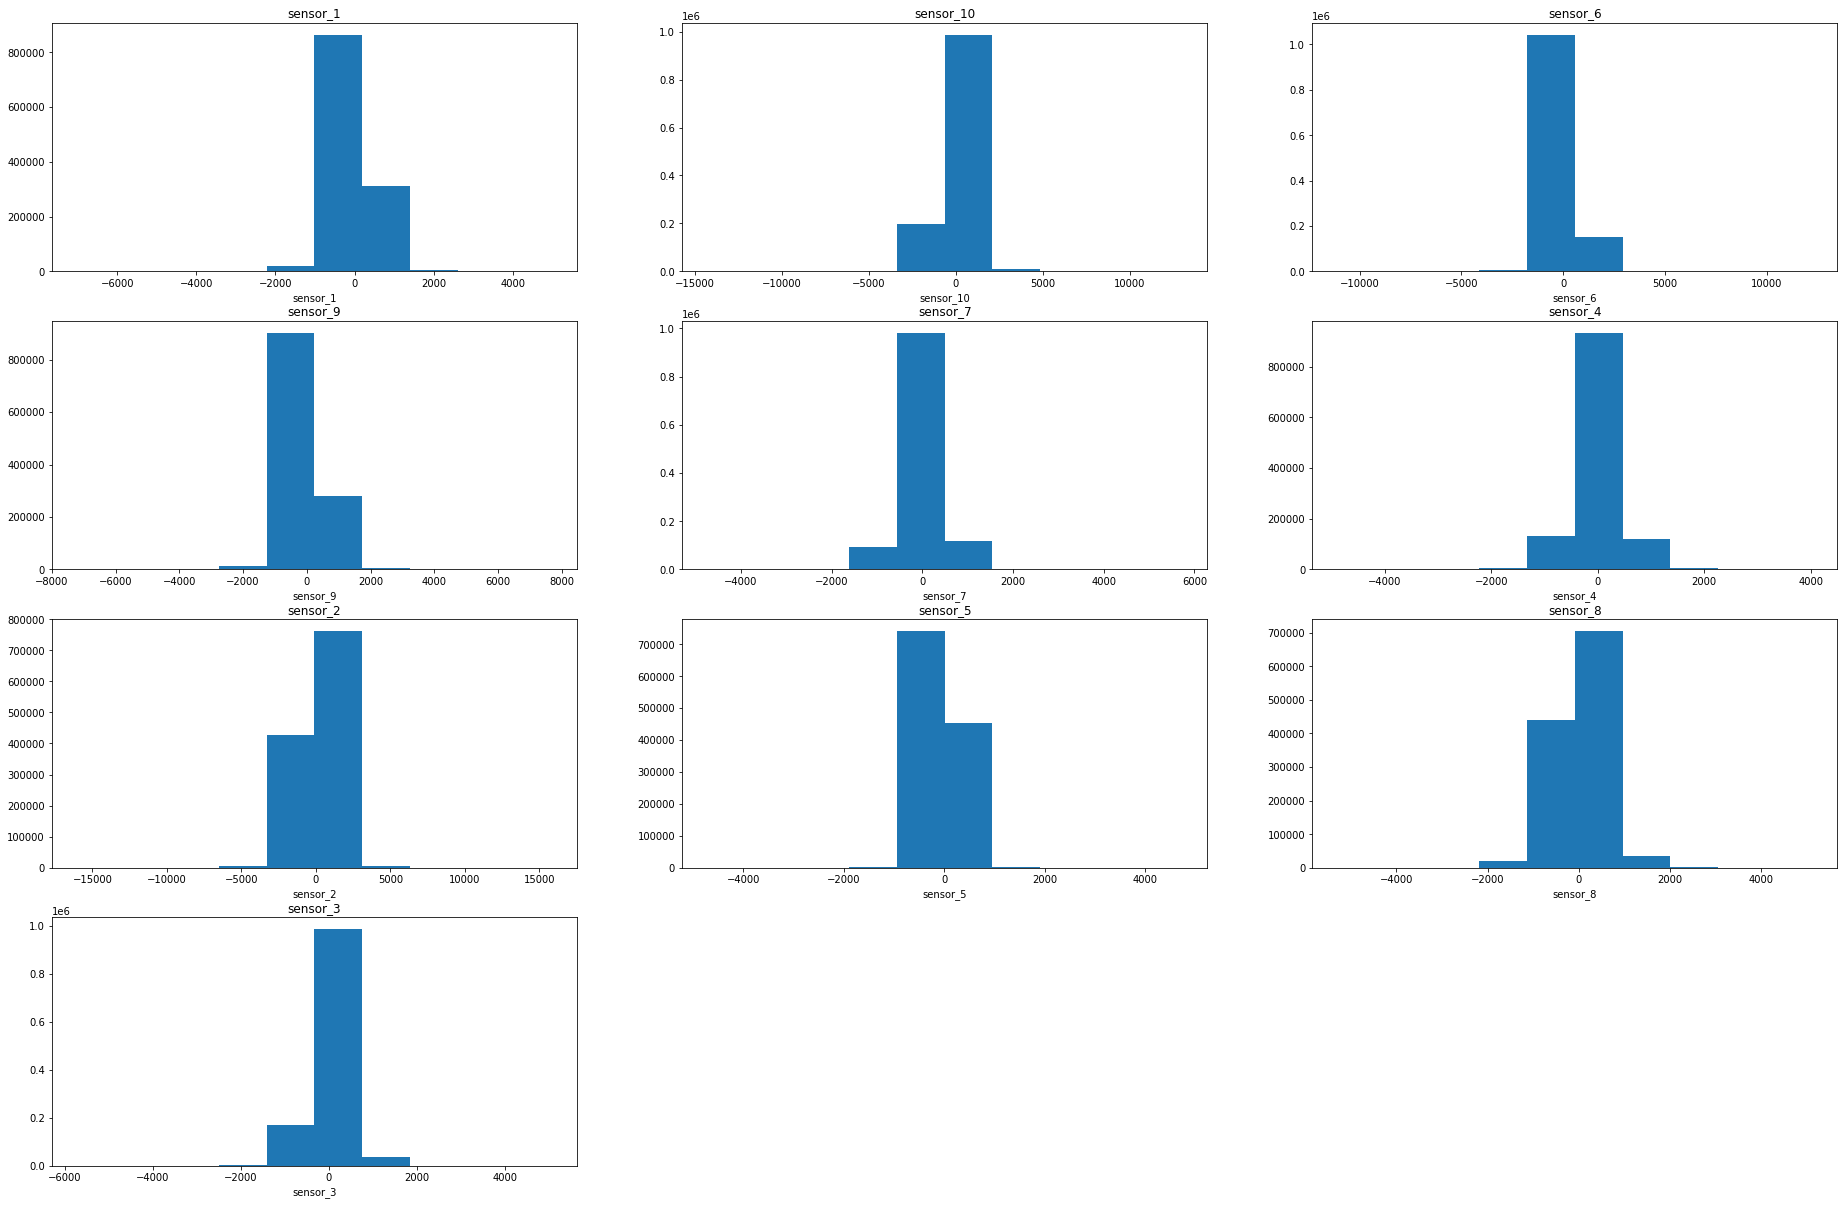

In [10]:
sensor_values = train_final.drop(['time_to_eruption','segment_id'],axis=1)
graph = plt.figure(figsize=(32,32))
for value,feature in enumerate(sensor_values.columns):
  plt.subplot(6,3,value+1)
  plt.hist(sensor_values[feature])
  plt.xlabel(feature)
  plt.title(feature) 

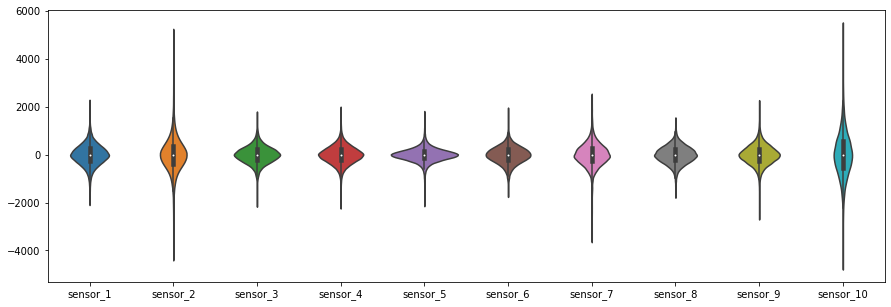

In [11]:
g = sns.violinplot(data=df)    #distributiion across a single file
g.figure.set_size_inches(15,5)

In [12]:
df=pd.read_csv('sample_submission.csv')
df.head()

,segment_id,time_to_eruption
0,1000213997,0
1,100023368,0
2,1000488999,0
3,1001028887,0
4,1001857862,0


In [13]:
df = pd.read_csv('test/1000213997.csv')
df.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
0,180.0,NaN,295.0,-221.0,-81.0,379.0,240.0,-288.0,152.0,0.0
1,200.0,NaN,199.0,-99.0,32.0,-226.0,241.0,-114.0,36.0,0.0
2,193.0,NaN,113.0,17.0,164.0,52.0,294.0,27.0,-21.0,0.0
3,188.0,NaN,26.0,125.0,274.0,-278.0,324.0,338.0,-22.0,0.0
4,177.0,NaN,-48.0,183.0,355.0,-363.0,356.0,339.0,-32.0,0.0


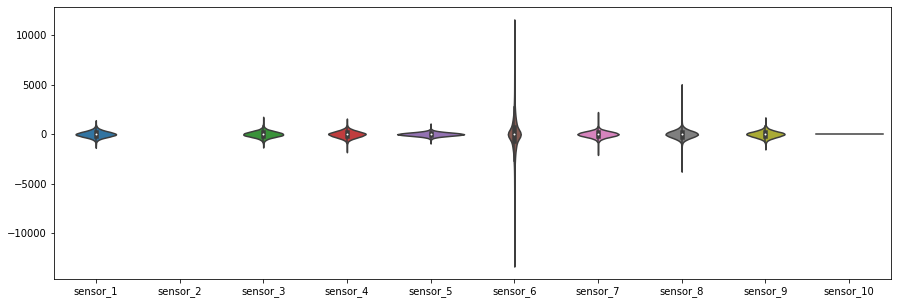

In [14]:
g = sns.violinplot(data=df)
g.figure.set_size_inches(15,5)

In [15]:
!ls

abishek   predict-volcanic-eruptions.ipynb  test   train.csv
data.zip  sample_submission.csv		    train


# Data

In [16]:
train = pd.read_csv("train.csv")
sample_submission = pd.read_csv("sample_submission.csv")


In [17]:
train_segment_csvs = glob.glob("train/*")
test_segment_csvs = glob.glob("test/*")

In [18]:
train_segment_csvs[0:5]

['train/579307667.csv',
 'train/579908624.csv',
 'train/579683001.csv',
 'train/580262567.csv',
 'train/581069262.csv']

In [19]:
test_segment_csvs[0:5]

['test/58542575.csv',
 'test/585632599.csv',
 'test/585794453.csv',
 'test/585631329.csv',
 'test/587942731.csv']

In [20]:
print("Number of files under train/ is:", len(train_segment_csvs))
print("Number of files under test/ is:", len(test_segment_csvs))

duplicated_segment_id = [segment_id for segment_id in [ test_segment_id.split("/")[-1] for test_segment_id in test_segment_csvs]
                         if (segment_id in [ train_segment_id.split("/")[-1] for train_segment_id in train_segment_csvs])]

print("Duplicates Segment ids both in train and test are:", len(duplicated_segment_id))

Number of files under train/ is: 4431
Number of files under test/ is: 4520
Duplicates Segment ids both in train and test are: 0


In [21]:
train['time_to_eruption'].describe()

count    4.431000e+03
mean     2.284891e+07
std      1.348439e+07
min      6.250000e+03
25%      1.127016e+07
50%      2.246559e+07
75%      3.434356e+07
max      4.904609e+07
Name: time_to_eruption, dtype: float64

In [22]:
# train['time_to_eruption'].describe()[1:]
# train['time_to_eruption'].describe()[1:].values

## Load Data & Cleanup *NaN*

In [23]:
from numpy import isnan
from sklearn.impute import KNNImputer

def cleanup_nan(X):
  imputer = KNNImputer()
  # fit on the dataset
  imputer.fit(X)
  # transform the dataset
  Xtrans = imputer.transform(X)
  X=Xtrans
  return X


In [25]:
def preprocess_data(input_X, segment_csv_dir):
  column_names = ["sensor_1", 	"sensor_2", 	"sensor_3", 	"sensor_4", 	"sensor_5", 	"sensor_6", 	"sensor_7", 	"sensor_8", 	"sensor_9", 	"sensor_10"]
  column_stats = ['mean', 'std', 'min', '25%', '50%', '75%', 'max']
  # Apart from describe stats [ extra ]--Follow order
  column_stats.extend(['sum', 'var', 'median', 'skew', 'mad', 'kurtosis'])

  #missing values
  column_stats.extend(['has_missing_sensors', 'missing_sensors%'])
                      
  columns = [ i+"_"+j for i in column_names for j in column_stats]
  X = pd.DataFrame(columns=columns)
  y = pd.DataFrame(columns=['time_to_eruption'])
  # display(X.columns)
  # train_csv = pd.read_csv(train_segment_csvs[0])
  for i, train_segment_csv in input_X.iterrows():
  #for train_segment_csv in train_segment_csvs[:10]:
    # train_csv = pd.read_csv(train_segment_csv)
    train_csv = pd.read_csv(str(segment_csv_dir) + "/" + str(train_segment_csv.segment_id) + ".csv")
    y.loc[len(X), :] = train_segment_csv.time_to_eruption
    row = []
    for feature in train_csv.columns:
      # Offset by 1 column to ignore count in describe--Follow order
      row.extend(train_csv[feature].describe()[1:].values)
      # Extra stats--Follow order
      row.extend([train_csv[feature].sum(), train_csv[feature].var(), \
                  train_csv[feature].median(), train_csv[feature].skew(), \
                  train_csv[feature].mad(), train_csv[feature].kurtosis()] )
      # add missing sensors value
      # if ( train_csv[feature].isnull().sum() > 0 ):
      #   has_missing_sensors = 1
      # else :
      #   has_missing_sensors = 0
      row.extend([ 1 if train_csv[feature].isnull().sum() else 0, train_csv[feature].isnull().sum() / len(train_csv) ])
    
    X.loc[len(X), :] = row
  # cleanup NaN values
  X = cleanup_nan(X)
  return X, y


In [26]:
X, y = preprocess_data(train, "train")

In [27]:
display(X)

array([[-1.61032316e+00,  3.03096099e+02, -1.42100000e+03, ...,
         1.02101017e-01,  0.00000000e+00,  0.00000000e+00],
       [ 1.42612623e+00,  4.38360560e+02, -2.00500000e+03, ...,
         1.60798953e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.50459159e+00,  2.41575415e+02, -1.11500000e+03, ...,
         6.15849350e-01,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.09993167e+00,  7.31138523e+02, -2.99900000e+03, ...,
         2.00322501e-01,  0.00000000e+00,  0.00000000e+00],
       [-1.08528191e+00,  1.32652571e+02, -6.27000000e+02, ...,
         1.03516752e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.05679905e+00,  3.34039437e+02, -1.42800000e+03, ...,
         5.71617536e-01,  0.00000000e+00,  0.00000000e+00]])

In [29]:
y

,time_to_eruption
0,12262005
1,32739612
2,14965999
3,26469720
4,31072429
5,22264866
6,34952168
7,9504818
8,11719563
9,11629084


# Train on data folder "train"-- use train.csv

In [30]:
!ls

abishek   predict-volcanic-eruptions.ipynb  test   train.csv
data.zip  sample_submission.csv		    train


In [34]:
simple_linear_model = LinearRegression().fit(X, y)

In [35]:
simple_linear_model.score(X, y)

1.0

#Predict

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
sample_submission = pd.read_csv("sample_submission.csv")

In [60]:
X_sample_submission, y_sample_submission = preprocess_data(sample_submission, "test")

In [61]:
y_sample_submission_pred = simple_linear_model.predict(X_sample_submission)

In [52]:
# # The coefficients
# #|print('Coefficients: \n', reg.coef_)
# # The mean squared error
# print('Mean squared error: %.2f'
#       % mean_squared_error(y_sample_submission, y_sample_submission_pred))
# # The coefficient of determination: 1 is perfect prediction
# print('Coefficient of determination: %.2f'
#       % r2_score(y_sample_submission, y_sample_submission_pred))

In [63]:
sample_submission = sample_submission.drop(['time_to_eruption'], axis=1)
sample_submission['time_to_eruption'] = y_sample_submission_pred
sample_submission.to_csv("out.csv")


In [64]:
# print(X_train.shape, y_train.shape)++z

<!-- ## Split Data to train & test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
## Train 
reg = LinearRegression().fit(X_train, y_train)
reg.score(X, y) -->

## Split Data to train & test

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Train 

In [ ]:
# reg = LinearRegression().fit(X_train, y_train)
# reg.score(X, y)

0.5792646931332865

In [34]:
# # Plot outputs
# plt.scatter(X_train, y_train,  color='black')
# plt.plot(X_test, y_pred, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())

#  plt.show()

In [35]:
# train_csv = pd.read_csv(train_segment_csvs[0])
# display(train_csv.sensor_1.describe())
# for i, row in train[:2].iterrows():
#   print("Segment ID: %d \t Time to Eruption: %d" %(row.segment_id, row.time_to_eruption) )
#   sensor_data = pd.read_csv("train/"+ str(row.segment_id) + ".csv")
#   #sensor_data = sensor_data.fillna(0)
#   #sensor_data = sensor_data.dropna(axis=1)
#   print(sensor_data.isna().sum())
#   with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(sensor_data.describe())
#   print(sensor_data.info())
#   print("--"*30)
# sensor_data.describe().unstack()
# def calculate_stats(sensor_row):
#   X = pd.DataFrame()
#   for row in sensor_row:
#     out = sensor_row[row].describe().values
#     print(out) 
          
# # display(train_csv.sensor_1.describe().values)
# #   print(sensor_row.describe())
#   #X = pd.DataFrame()
#   # sensor_row.mean()
#   # input_data.sum()
#   # X.loc[ts, f'{sensor_id}_mean']      = signal.mean()
#   # X.loc[ts, f'{sensor_id}_std']       = signal.std()
#   # X.loc[ts, f'{sensor_id}_var']       = signal.var() 
#   # X.loc[ts, f'{sensor_id}_max']       = signal.max()
#   # X.loc[ts, f'{sensor_id}_min']       = signal.min()

# # def basic_statistics(, sensor_id, s):
# #     """Computes basic statistics for the training feature set.
    
# #     Args:
# #         t_X (pandas.DataFrame): The feature set being built.
# #         x (pandas.Series): The signal values.
# #         s (int): The integer number of the segment.
# #         postfix (str): The postfix string value.
# #     Return:
# #         t_X (pandas.DataFrame): The feature set being built.
# #     """
# #     X = pd.DataFrame()
# #     X.loc[sensor_num, f'{sensor_id}_mean']      = signal.mean()
# #     X.loc[sensor_num, f'{sensor_id}_std']       = signal.std()
# #     X.loc[sensor_num, f'{sensor_id}_var']       = signal.var() 
# #     X.loc[sensor_num, f'{sensor_id}_max']       = signal.max()
# #     X.loc[sensor_num, f'{sensor_id}_min']       = signal.min()

# #     X.loc[s, f'{sensor}_sum{postfix}']       = x.sum()
# #     t_X.loc[s, f'{sensor}_mean{postfix}']      = x.mean()
# #     t_X.loc[s, f'{sensor}_std{postfix}']       = x.std()
# #     t_X.loc[s, f'{sensor}_var{postfix}']       = x.var() 
# #     t_X.loc[s, f'{sensor}_max{postfix}']       = x.max()
# #     t_X.loc[s, f'{sensor}_min{postfix}']       = x.min()
# #     t_X.loc[s, f'{sensor}_median{postfix}']    = x.median()
# #     t_X.loc[s, f'{sensor}_skew{postfix}']      = x.skew()
# #     t_X.loc[s, f'{sensor}_mad{postfix}']       = x.mad()
# #     t_X.loc[s, f'{sensor}_kurtosis{postfix}']  = x.kurtosis()

# #     return t_X
# for i, row in train[:1].iterrows():
#   print("Segment ID: %d \t Time to Eruption: %d" %(row.segment_id, row.time_to_eruption) )
#   sensor_data = pd.read_csv("train/"+ str(row.segment_id) + ".csv")
#   print(calculate_stats(sensor_data))
#   #sensor_data = sensor_data.fillna(0)
#   #sensor_data = sensor_data.dropna(axis=1)
#   # print(sensor_data.isna().sum())
#   # with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#   #   print(sensor_data.describe())
#   # print(sensor_data.info())
#   print("--"*30)
# train
# # train_379022420 = pd.read_csv("train/379022420.csv")
# # train_1002275321 = pd.read_csv("train/1002275321.csv")
# train.head()
# train.info()

# train_final = pd.DataFrame(columns={'segment_id', 'time_to_eruption', 'sensor_1', 'sensor_2', 'sensor_3',
#        'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9',
#        'sensor_10'})
# for i, row in train[0:20].iterrows():
#   sensor_data = pd.read_csv("train/"+ str(row.segment_id) + ".csv")
#   sensor_data['segment_id'] = row.segment_id
#   train1 = train.merge(sensor_data, on='segment_id')
#   # train_1_describe = pd.DataFrame(train1.describe()).reset_index()
#   # train_1_describe['segment_id'] = row.segment_id
#   train_final = pd.concat([train_final, train1], axis=0)
# train_final = train_final.reset_index(drop=True)
# train_final.groupby(['segment_id', 'time_to_eruption']).mean()
# train_final.isna().sum()

In [36]:
# for train_segment_csv in train_segment_csvs[0:1]:
#   train_csv = pd.read_csv(train_segment_csv)
#   display(train_csv.sensor_1.describe().keys())

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [36]:
# #Writing it to a csv
# import numpy as np 
# y_pred1=rfr.predict(scaled_test_data)
# y_final=np.array(y_pred1)
# result=y_final.flatten()

# final=pd.DataFrame({'segment_id':test_csv_table['segment_id'],'time_to_eruption':result})
# final.to_csv('Submission.csv', index = False)